In [1]:
# Reset name space
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
# Set notebook display
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# import data analysis libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Set data path
data_path = os.path.join(os.path.abspath('..'), 'data', 'rawdata.csv')

if os.path.exists(data_path):
    print('Input file:', data_path)
else:
    print('Please fix the path!')

Input file: /Users/rolf/Downloads/noncomp/rank/data/rawdata.csv


In [37]:
# import raw data; set first column as index name
raw_data = pd.read_csv(data_path, index_col = 0)

In [38]:
# Read header to check the quality and variables of dataset
raw_data.head()

,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt,Latitude,Longitude,Location
City,,,,,,,,,,,,,,,,,,
Beijing,0.38,4.753,20.097,77.82,60.41,56.735,30.819,1.30,1035.44,168.0,87.67,86.10,99.59,18.76,380.678,40.894,116.513,Eastern
Tianjin,0.57,2.493,15.196,49.68,41.82,43.147,32.701,3.50,1125.53,175.0,98.91,100.00,96.23,13.41,182.558,39.085,117.199,Eastern
Shijiazhuang,1.11,2.779,14.087,55.66,48.98,24.613,25.847,3.61,1818.86,97.0,95.10,95.85,71.98,11.68,205.637,38.043,114.514,Eastern
Qinhuangdao,0.96,2.763,17.193,64.65,92.87,67.342,24.000,3.37,1745.81,239.0,65.00,98.38,157.94,9.10,134.561,39.935,119.600,Eastern
Baoding,0.98,2.803,15.816,37.61,40.49,28.145,21.721,4.02,3377.68,79.0,86.20,91.39,82.37,21.19,162.130,38.874,115.465,Eastern


In [39]:
# Drop columns ['Latitude', 'Longitude', 'Location]
raw_data = raw_data.drop(['Latitude', 'Longitude', 'Location'], axis = 1)

In [40]:
# Check the new raw_data
raw_data.head()

,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt
City,,,,,,,,,,,,,,,
Beijing,0.38,4.753,20.097,77.82,60.41,56.735,30.819,1.30,1035.44,168.0,87.67,86.10,99.59,18.76,380.678
Tianjin,0.57,2.493,15.196,49.68,41.82,43.147,32.701,3.50,1125.53,175.0,98.91,100.00,96.23,13.41,182.558
Shijiazhuang,1.11,2.779,14.087,55.66,48.98,24.613,25.847,3.61,1818.86,97.0,95.10,95.85,71.98,11.68,205.637
Qinhuangdao,0.96,2.763,17.193,64.65,92.87,67.342,24.000,3.37,1745.81,239.0,65.00,98.38,157.94,9.10,134.561
Baoding,0.98,2.803,15.816,37.61,40.49,28.145,21.721,4.02,3377.68,79.0,86.20,91.39,82.37,21.19,162.130


In [41]:
# Necessary data preprocessing before pair-wise comparison is needed 
# since both benefit and cost variables are included in the raw_data matrix。
# Here what I am about to do is to normalize raw data to render the variables comparable
# raw_norm = raw_data.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))

In [42]:
# normalize cost type indicators
data_to_norm_cost = raw_data[['EnerCon', 'WatCon', 'Engle', 'Unemp', 'PopDen']]
normalized_cost = data_to_norm_cost.apply(lambda x: (np.max(x)- x)/(np.max(x)-np.min(x)))

In [43]:
# normalize benefit type indicators
data_to_norm_bene = raw_data.drop(['EnerCon', 'WatCon', 'Engle', 'Unemp', 'PopDen'], axis = 1)
normalized_bene = data_to_norm_bene.apply(lambda x: (x - np.min(x))/(np.max(x)-np.min(x)))

In [44]:
# reconcatenate cost and benefit indicators into a DataFrame for further analysis
normalized_data = pd.concat([normalized_cost, normalized_bene], axis = 1)

In [45]:
# reorder the columns to render a sequence as same as the original sequence 
sequence = raw_data.columns
normalized_data = normalized_data.reindex(columns = sequence)

In [13]:
# Check the reorderred DataFrame
normalized_data.head()

,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt
City,,,,,,,,,,,,,,,
Beijing,0.893634,1.000000,0.554920,1.000000,0.466294,0.849516,0.517706,1.000000,0.847562,0.328413,0.804689,0.598266,0.579581,0.159141,0.106449
Tianjin,0.817083,0.498335,0.392968,0.300174,0.160638,0.897654,0.417939,0.214286,0.829570,0.354244,0.982734,1.000000,0.555371,0.099644,0.041950
Shijiazhuang,0.599517,0.561820,0.356321,0.448893,0.278362,0.963315,0.781277,0.175000,0.691098,0.066421,0.922382,0.880058,0.380647,0.080405,0.049464
Qinhuangdao,0.659952,0.558269,0.458958,0.672470,1.000000,0.811938,0.879188,0.260714,0.705688,0.590406,0.445588,0.953179,1.000000,0.051713,0.026325
Baoding,0.651894,0.567148,0.413456,0.000000,0.138770,0.950802,1.000000,0.028571,0.379772,0.000000,0.781403,0.751156,0.455508,0.186165,0.035300


In [14]:
normalized_data.to_csv('../data/normalized_data.csv') # save normalized data

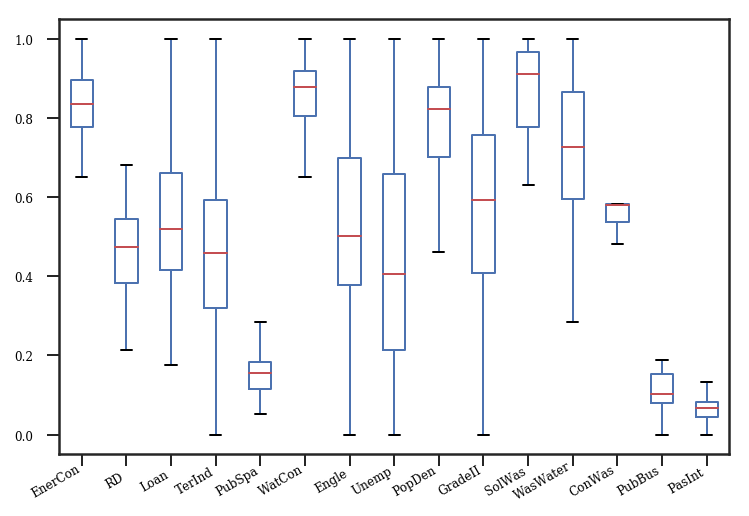

In [46]:
# plot comparative boxplot of indicator for forty cities
fig, ax = plt.subplots()

font = {'family' : 'serif',  
        'color'  : 'k',  
        'weight' : 'normal',  
        'size'   : 6,  
        } 
meanprops = dict(marker = '^', markerfacecolor='none', 
                 markersize=4, linestyle='none', linewidth = 0.5)


sns.set_style('ticks')
_, boxplot = normalized_data.boxplot(ax = ax, grid = False, figsize = (8, 8),
                        showmeans = False, meanprops = meanprops, return_type = 'both')

ax.set_xticklabels(list(normalized_data.columns),rotation = 30, fontdict=font, ha = 'right', va = 'center')

ax.set_yticks(np.linspace(0,1,6))  
ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontdict = font)

plt.show()

In [17]:
fig.savefig('../results/comparative_boxplot_indicators.pdf')

In [47]:
# outliers = [flier.get_ydata() for flier in boxplot["fliers"]]
# boxes = [box.get_ydata() for box in boxplot["boxes"]]
# medians = [median.get_ydata() for median in boxplot["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot["whiskers"]]

In [48]:
# Set Preference threshold and indifference threshold by low whisker value and 25% quartile for each indicator.
# Since 'whiskers' includes four data for each indicator, i.e. low whisker, high whisker, 25% and 75%, 
# we need to extract the data for further analysis

whiskers_low_quartile  = []
for i in range(len(whiskers)):
    if i % 2 == 0:
        whiskers_low_quartile.append(whiskers[i])

whiskers_low_quartile = pd. DataFrame(whiskers_low_quartile, 
                                      index = normalized_data.columns, 
                                      columns = ['Preference threshold', 'Indifference threshold'])

whiskers_low_quartile = whiskers_low_quartile.T
whiskers_low_quartile 

,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt
Preference threshold,0.779009,0.38313,0.416950,0.321251,0.115751,0.804843,0.378181,0.214286,0.702564,0.407749,0.778631,0.596460,0.536584,0.079932,0.043927
Indifference threshold,0.651894,0.21465,0.175335,0.000000,0.051134,0.652279,0.000000,0.000000,0.462638,0.000000,0.632029,0.283815,0.481663,0.000000,0.000000


In [20]:
whiskers_low_quartile.to_csv('../data/thresholds.csv') # save thresholds

In [21]:
# nest weight
nest_weight_list = [1/16, 1/16, 1/16, 1/16, 1/20, 1/20, 1/20, 1/20, 1/20, 1/16, 1/16, 1/16, 1/16, 1/8, 1/8]

# Check whether sum of weights equals to 1 or not.
sum_weight = 0
for weight in nest_weight_list:
    sum_weight += weight
    
sum_weight

1.0

In [22]:
nest_weight = pd.DataFrame(nest_weight_list, index = normalized_data.columns, columns = ['Weight'])
nest_weight = nest_weight.T
nest_weight

,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt
Weight,0.0625,0.0625,0.0625,0.0625,0.05,0.05,0.05,0.05,0.05,0.0625,0.0625,0.0625,0.0625,0.125,0.125


In [23]:
type(nest_weight)

pandas.core.frame.DataFrame

In [24]:
nest_weight.to_csv('../data/nest_weight.csv') # save weight

In [49]:
# data is to be ready: normalized_data and whiskers_low_quartile.
# rename these two data set as nd and wlq

nd, wlq = normalized_data, whiskers_low_quartile

In [50]:
# Define a function to calculate OUTRANKING MATRIX
def outranking_matrix(perf_matrix, threshold_matrix, weight, indif_pref_coeff, weak_pref_coeff):
    '''
    Parameter:
    perf_matrix: entity's performance matrix; DataFrame
    threshold_matrix: first row is perference threshold value of each indicator,
                      second row is indifference threshold value of each indicator
                      DataFrame
    weight: weight of each indicator, list
    indif_pref_coeff: coefficient of indifference, float
    weak_pref_coeff: coefficient of weak preference, float
    
    Return values include intermediate pair-wise comparison matrix: inter_value
    pair-matrix and outranking matrix.
    '''
    # pair-wise comparison
    import itertools
    
    m, n = perf_matrix.shape
    
    # pair-wise matrix of rows for comparison
    pair_matrix = pd.DataFrame(list(itertools.combinations(list(range(m)), 2)))
    
    i, j = pair_matrix.shape
    
    # Define a empty DataFrame for store the intermediate pair-wise comparison value
    inter_value = pd.DataFrame(index = pair_matrix.index, columns = perf_matrix.columns)
    
    # assume that comparison two entities a and b, if a's perform better than b on indicator j, the corresponding
    # element in intermediate pair_wise comparision matrix equals to 2. Similarly, if indiffence, equals to 1,
    # if weak perference, equals to 3. If b perform better than a on indicator j, the corresponding
    # element in intermediate pair_wise comparision matrix equals to 0.
    for i in range(i):
        for cn in range(n):
            if np.absolute(perf_matrix.iloc[pair_matrix.iat[i, 0], cn] - perf_matrix.iloc[pair_matrix.iat[i, 1], cn]) <= threshold_matrix.iloc[1, cn]:
                inter_value.iloc[i, cn] = 1
            elif perf_matrix.iloc[pair_matrix.iat[i, 0], cn] > perf_matrix.iat[pair_matrix.iloc[i, 1], cn] and np.absolute(perf_matrix.iat[pair_matrix.iloc[i, 0], cn] - perf_matrix.iat[pair_matrix.iloc[i, 1], cn]) > threshold_matrix.iloc[0, cn]:
                inter_value.iloc[i, cn] = 2
            elif threshold_matrix.iloc[1, cn] < np.absolute(perf_matrix.iat[pair_matrix.iloc[i, 0], cn] - perf_matrix.iat[pair_matrix.iloc[i, 1], cn]) <= threshold_matrix.iloc[0, cn]:
                inter_value.iloc[i, cn] = 3
            else:
                inter_value.iloc[i, cn] = 0
                
        
    for i in range(i+1):
        for cn in range(n):
            if inter_value.iloc[i, cn] == 1:
                inter_value.iloc[i, cn] = indif_pref_coeff * weight.iloc[0, cn]
            elif inter_value.iloc[i, cn] == 2:
                inter_value.iloc[i, cn] = weight.iloc[0, cn]
            elif inter_value.iloc[i, cn] == 3:
                inter_value.iloc[i, cn] = indif_pref_coeff * weight.iloc[0, cn]
            else:
                inter_value.iloc[i, cn] = 0
                
    pair_matrix['outranking_matrix_element_value'] = inter_value.sum(axis = 1)
    
    # generate outranking matrix
    outranking_matrix = pd.DataFrame(0, index = perf_matrix.index, columns = perf_matrix.index)
    
    for row in range(len(pair_matrix)):
        outranking_matrix.iloc[pair_matrix.iloc[row, 0], pair_matrix.iloc[row, 1]] = pair_matrix.iloc[row, 2]
        outranking_matrix.iloc[pair_matrix.iloc[row, 1], pair_matrix.iloc[row, 0]] = 1 - pair_matrix.iloc[row, 2]
                
    return outranking_matrix, inter_value, pair_matrix 

In [27]:
outranking_matrix, inter_value, pair_matrix = outranking_matrix(nd, wlq, nest_weight, 1/2, 1/2)

In [28]:
outranking_matrix['RowSum'] = outranking_matrix.sum(axis = 1)
outranking_matrix['Rank'] = outranking_matrix['RowSum'].rank(ascending = False)

In [62]:
outranking_matrix.to_csv('../data/outranking_matrix_rank.csv')

In [31]:
outranking_matrix.head()

City,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xi’an,Lanzhou,Urumqi,RowSum,Rank
City,,,,,,,,,,,,,,,,,,,,,
Beijing,0.0000,0.67500,0.67500,0.68750,0.65000,0.76875,0.58125,0.73750,0.58125,0.67500,...,0.73750,0.5500,0.51875,0.64375,0.61250,0.61250,0.70625,0.6125,24.93750,1.0
Tianjin,0.3250,0.00000,0.47500,0.41875,0.41250,0.50625,0.43750,0.50000,0.43750,0.47500,...,0.56250,0.4375,0.46875,0.50000,0.47500,0.50000,0.44375,0.4375,17.81875,35.0
Shijiazhuang,0.3250,0.52500,0.00000,0.41250,0.49375,0.53125,0.46250,0.52500,0.38125,0.52500,...,0.58125,0.3375,0.48750,0.49375,0.40625,0.50000,0.43125,0.4625,18.00000,30.0
Qinhuangdao,0.3125,0.58125,0.58750,0.00000,0.58125,0.58750,0.43125,0.58125,0.46250,0.55625,...,0.58125,0.4250,0.45625,0.51875,0.31250,0.46250,0.49375,0.4000,19.04375,21.0
Baoding,0.3500,0.58750,0.50625,0.41875,0.00000,0.50625,0.40625,0.50000,0.38125,0.53125,...,0.55625,0.4000,0.40625,0.46250,0.35000,0.53125,0.43750,0.4000,17.86250,32.5


# Sensitivity analysis

## Different weight method

In [51]:
# indicator weight

m, n = nd.shape
ind_weight = pd.DataFrame(np.repeat(1/n, n), index = nd.columns, columns = ['Indicator weight'])
ind_weight = ind_weight.T
ind_weight.sum(axis = 1)
ind_weight

,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt
Indicator weight,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667


In [44]:
ind_weight.to_csv('../data/ind_weight.csv')

In [52]:
outranking, inter, pair = outranking_matrix(nd, wlq, ind_weight, 1/2, 1/2)

In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [53]:
outranking.head()

City,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xi’an,Lanzhou,Urumqi
City,,,,,,,,,,,,,,,,,,,,,
Beijing,0.000000,0.666667,0.666667,0.633333,0.633333,0.733333,0.600000,0.700000,0.600000,0.666667,...,0.733333,0.600000,0.700000,0.600000,0.533333,0.633333,0.633333,0.633333,0.700000,0.633333
Tianjin,0.333333,0.000000,0.466667,0.400000,0.433333,0.500000,0.466667,0.500000,0.466667,0.466667,...,0.533333,0.400000,0.533333,0.466667,0.466667,0.500000,0.466667,0.500000,0.466667,0.466667
Shijiazhuang,0.333333,0.533333,0.000000,0.400000,0.533333,0.533333,0.500000,0.533333,0.400000,0.533333,...,0.533333,0.400000,0.566667,0.400000,0.500000,0.500000,0.433333,0.500000,0.466667,0.500000
Qinhuangdao,0.366667,0.600000,0.600000,0.000000,0.633333,0.600000,0.500000,0.600000,0.533333,0.566667,...,0.566667,0.533333,0.600000,0.500000,0.500000,0.566667,0.366667,0.500000,0.533333,0.466667
Baoding,0.366667,0.566667,0.466667,0.366667,0.000000,0.466667,0.433333,0.466667,0.400000,0.500000,...,0.500000,0.466667,0.533333,0.433333,0.400000,0.466667,0.366667,0.500000,0.433333,0.433333


In [55]:
outranking['RowSum'] = outranking.sum(axis = 1)
outranking['Rank'] = outranking['RowSum'].rank(ascending = False)
outranking.head()

City,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xi’an,Lanzhou,Urumqi,RowSum,Rank
City,,,,,,,,,,,,,,,,,,,,,
Beijing,0.000000,0.666667,0.666667,0.633333,0.633333,0.733333,0.600000,0.700000,0.600000,0.666667,...,0.700000,0.600000,0.533333,0.633333,0.633333,0.633333,0.700000,0.633333,49.866667,1.0
Tianjin,0.333333,0.000000,0.466667,0.400000,0.433333,0.500000,0.466667,0.500000,0.466667,0.466667,...,0.533333,0.466667,0.466667,0.500000,0.466667,0.500000,0.466667,0.466667,35.866667,35.0
Shijiazhuang,0.333333,0.533333,0.000000,0.400000,0.533333,0.533333,0.500000,0.533333,0.400000,0.533333,...,0.566667,0.400000,0.500000,0.500000,0.433333,0.500000,0.466667,0.500000,36.933333,32.0
Qinhuangdao,0.366667,0.600000,0.600000,0.000000,0.633333,0.600000,0.500000,0.600000,0.533333,0.566667,...,0.600000,0.500000,0.500000,0.566667,0.366667,0.500000,0.533333,0.466667,41.066667,8.0
Baoding,0.366667,0.566667,0.466667,0.366667,0.000000,0.466667,0.433333,0.466667,0.400000,0.500000,...,0.533333,0.433333,0.400000,0.466667,0.366667,0.500000,0.433333,0.433333,35.066667,37.0
